In [3]:
from delay_simulate import delay_simulate
a = [1,2,3,4,5]
delay_simulate(a,[0,0,0])

[0, 0, 0, 1, 2]

In [3]:
sumo = [
    463.82999999999987,
    3095.0900000000015,
    8516.970000000008,
    15372.829999999989,
    22739.31,
    30412.759999999984,
    38375.489999999976,
    46883.25999999996,
    56073.74000000006,
    66317.75,
    77790.61999999998,
    90090.64999999979,
]
ctm = [
    0.0,
    1566.9755554199219,
    3553.5992431640625,
    5548.0322265625,
    7550.2734375,
    9560.321044921875,
    11578.17626953125,
    13605.44189453125,
    15630.1953125,
    17667.0458984375,
    19715.98876953125,
    21777.54638671875,
]
time0 = [100 * i for i in range(1, 13)]

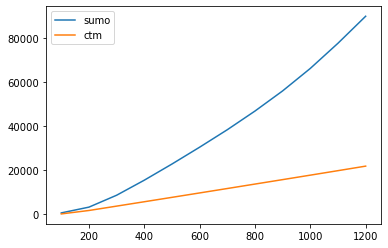

In [4]:
from matplotlib import pyplot as plt
plt.plot(time0, sumo, label='sumo')
plt.plot(time0, ctm, label='ctm')
plt.legend()

(0.0, 1500.0)

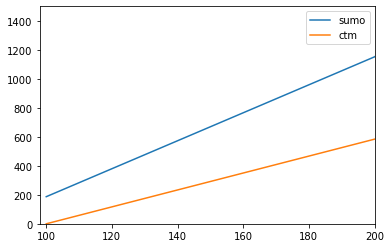

In [7]:
sumo = [
    187.07000000000002,
    1151.69,
    2722.0499999999997,
    4233.550000000001,
    5703.540000000001,
    7098.260000000005,
    8644.950000000003,
    10312.000000000007,
    11952.940000000006,
    13652.990000000013,
    15306.520000000002,
    16917.45,
]
ctm = [
    0.0,
    583.7839126586914,
    1323.2315063476562,
    2065.5908203125,
    2810.8621215820312,
    3559.0469360351562,
    4310.143737792969,
    5064.751892089844,
    5818.548583984375,
    6576.85791015625,
    7339.677734375,
    8107.20947265625,
]
time0 = [100 * i for i in range(1, 13)]
from matplotlib import pyplot as plt
plt.plot(time0, sumo, label='sumo')
plt.plot(time0, ctm, label='ctm')
plt.legend()
plt.xlim(98, 200)
plt.ylim(0, 1500)

[2356.2838397060336, 4180.349160484525, 5959.330998854161, 7839.29353681489, 9789.597360150383, 11706.467118891076, 13503.935196299504, 15538.313055574912, 17622.145519337675, 19361.14799176124]


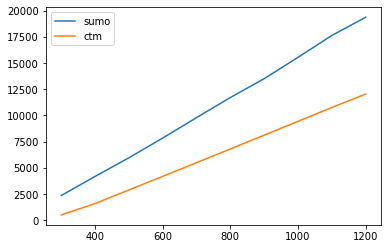

In [42]:
og_sumo = [
    181.0285002020941,
    1368.5810924092925,
    2356.2838397060336,
    1824.065320778491,
    1778.9818383696368,
    1879.9625379607292,
    1950.3038233354937,
    1916.8697587406937,
    1797.4680774084275,
    2034.377859275408,
    2083.8324637627643,
    1739.0024724235668,
]
ctm = [
    506.6415786743164,
    1591.7808532714844,
    2886.9924926757812,
    4186.71630859375,
    5490.9454345703125,
    6799.678955078125,
    8112.9254150390625,
    9430.68359375,
    10753.155517578125,
    12034.29443359375,
]
sumo = og_sumo[2:]
temp = sumo[0]
for i in range(1,len(sumo)):
    sumo[i] += temp
    temp = sumo[i]
print(sumo)
time0 = [100 * i for i in range(3, 13)]
from matplotlib import pyplot as plt
plt.plot(time0, sumo, label='sumo')
plt.plot(time0, ctm, label='ctm')
plt.legend()


Text(0, 0.5, 'sumo')

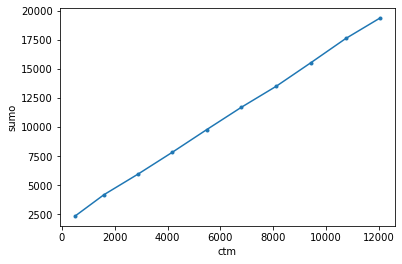

In [43]:
plt.plot(ctm, sumo, marker='.')
plt.xlabel('ctm')
plt.ylabel('sumo')

           ctm      sumo
ctm   1.000000  0.999903
sumo  0.999903  1.000000


<AxesSubplot:>

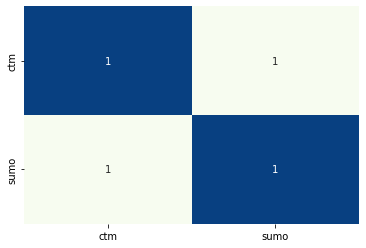

In [32]:
import pandas as pd
import seaborn as sns
resultdf = pd.DataFrame({'ctm':ctm, 'sumo':sumo})
corr = resultdf.corr() 
print(corr)
sns.heatmap(corr, cmap='GnBu', annot=True, cbar=False)

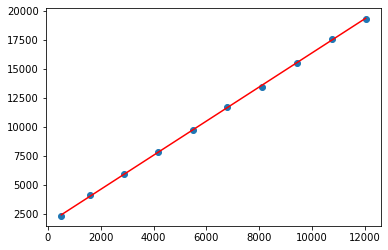

In [40]:
import numpy as np

ctm = np.array(ctm).reshape((-1, 1))
sumo = np.array(sumo)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 训练模型
model.fit(ctm, sumo)

# 计算预测值
y_pred = model.predict(ctm)

# 绘制原始数据和拟合直线
plt.scatter(ctm, sumo)
plt.plot(ctm, y_pred, color='red')
plt.show()

In [41]:
print(model.coef_, model.intercept_)

[1.46905752] 1707.8195921444476


重写了新的延误读取

In [28]:
og_sumo=[2.8540945620690583, 4.922126994261095, 10.034460464171017, 15.167019053808257, 17.756409122180855, 17.768167018331976, 17.549891115619065, 18.218071958368714, 17.890610537660436, 17.48760503602711, 16.25043118547531, 17.100962357423022, 18.41587105436694, 18.26050827913568, 18.34927656458144, 17.125934996538827, 17.053663043366473, 17.95598676563732, 16.46441114230664, 15.421931852573831, 15.69890882239517, 15.637147325571673, 16.195811380771058, 16.99268030471304, 17.423607612665993]
og_ctm= [16.967024075782906, 16.918937553793693, 17.45743832345736, 17.859343189304155, 17.85934512898073, 17.85934124962758, 17.85934512898073, 17.859347068657307, 17.859349008333883, 17.859352887687038, 17.859358706716762, 17.859362586069913, 17.859362586069913, 17.85936452574649, 17.859370344776217]
og_sumo = og_sumo[10:]
time0 = [55 * i for i in range(15)]


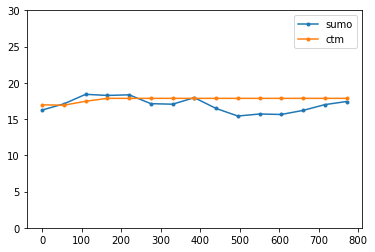

In [29]:
from matplotlib import pyplot as plt
plt.plot(time0, og_sumo, label="sumo", marker='.')
plt.plot(time0, og_ctm, label="ctm", marker='.')
plt.legend()
plt.ylim(0, 30)
plt.show()

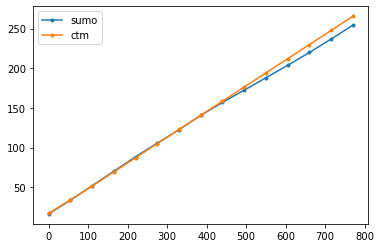

In [30]:
sumo_delay = [16.25043118547531, 33.351393542898336, 51.767264597265275, 70.02777287640096, 88.3770494409824, 105.50298443752123, 122.5566474808877, 140.512634246525, 156.97704538883164, 172.39897724140548, 188.09788606380064, 203.73503338937232, 219.93084477014338, 236.92352507485643, 254.34713268752242]
ctm_delay = [16.967024075782906, 33.8859616295766, 51.34339995303396, 69.20274314233811, 87.06208827131884, 104.92142952094642, 122.78077464992715, 140.64012171858445, 158.49947072691833, 176.35882361460537, 194.21818232132213, 212.07754490739205, 229.93690749346197, 247.79627201920846, 265.65564236398467]

plt.plot(time0, sumo_delay, label="sumo", marker='.')
plt.plot(time0, ctm_delay, label="ctm", marker='.')
plt.legend()
# plt.ylim(0, 30)
plt.show()

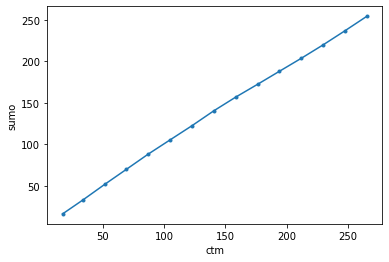

           ctm      sumo
ctm   1.000000  0.999583
sumo  0.999583  1.000000


<AxesSubplot:>

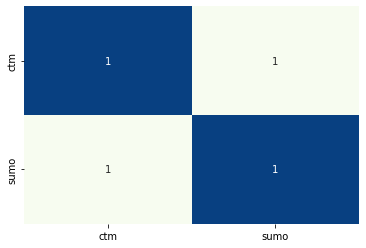

In [31]:

plt.plot(ctm_delay, sumo_delay, marker='.')
plt.xlabel('ctm')
plt.ylabel('sumo')
plt.show()

import pandas as pd
import seaborn as sns
resultdf = pd.DataFrame({'ctm':ctm_delay, 'sumo':sumo_delay})
corr = resultdf.corr() 
print(corr)
sns.heatmap(corr, cmap='GnBu', annot=True, cbar=False)



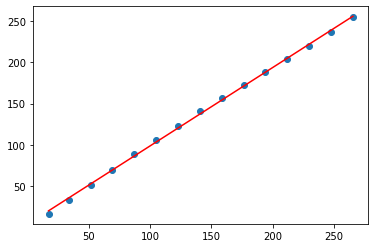

[0.94828] 3.9072713550844753


In [32]:
import numpy as np
ctm_delay = np.array(ctm_delay).reshape((-1, 1))
sumo_delay = np.array(sumo_delay)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# 训练模型
model.fit(ctm_delay, sumo_delay)
# 计算预测值
y_pred = model.predict(ctm_delay)
# 绘制原始数据和拟合直线
plt.scatter(ctm_delay, sumo_delay)
plt.plot(ctm_delay, y_pred, color='red')
plt.show()
print(model.coef_, model.intercept_)


In [1]:
from webster import phase4webster
duration = phase4webster(
    [400, 400, 200, 200]
)
duration

0.36000000000000004
54


[20, 7, 11, 5]

In [35]:
import traci
traci.start(
    [
        "sumo",
        "-c",
        "./SUMO_Input/Test4.sumocfg",
        "--statistic-output",
        "SUMO_Output/statistic.xml",
        "--duration-log.statistics",
        "--tripinfo-output.write-unfinished",
    ]
)

(20, 'SUMO 1.16.0')